In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Wczytanie

In [85]:
data = pd.read_excel('data/Pyły Bydgoszcz .xlsx', header = 5)
data.columns = ['Date', 'PM2.5']
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
data = data.drop(columns=['Date'])


In [86]:
data.head()

,PM2.5
Date,
2022-01-01,4.934921
2022-01-02,10.341562
2022-01-03,5.007348
2022-01-04,9.688094
2022-01-05,5.914476


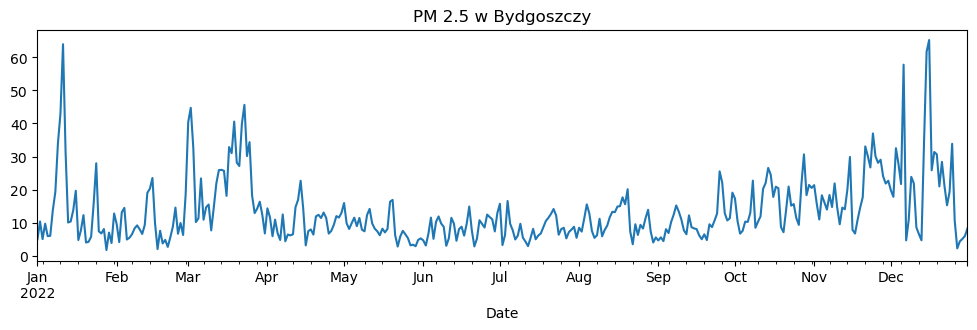

In [87]:
data['PM2.5'].plot(title='PM 2.5 w Bydgoszczy', figsize=(12,3))
plt.show()

## Feature Engineering

#### Okna typu rolling

In [88]:
window_sizes = [7, 14, 30]
statistics = ['mean', 'std', 'min', 'max']

for size in window_sizes:
    for stat in statistics:
        data[f'Rolling_{size}_{stat}'] = data['PM2.5'].rolling(window=size, closed='left').agg(stat)


In [89]:
data.head(31)

,PM2.5,Rolling_7_mean,Rolling_7_std,Rolling_7_min,Rolling_7_max,Rolling_14_mean,Rolling_14_std,Rolling_14_min,Rolling_14_max,Rolling_30_mean,Rolling_30_std,Rolling_30_min,Rolling_30_max
Date,,,,,,,,,,,,,
2022-01-01,4.934921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,10.341562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,5.007348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,9.688094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,5.914476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,6.005189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,13.716152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-08,19.322357,7.943963,3.358183,4.934921,13.716152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-09,33.909314,9.999311,5.139823,5.007348,19.322357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


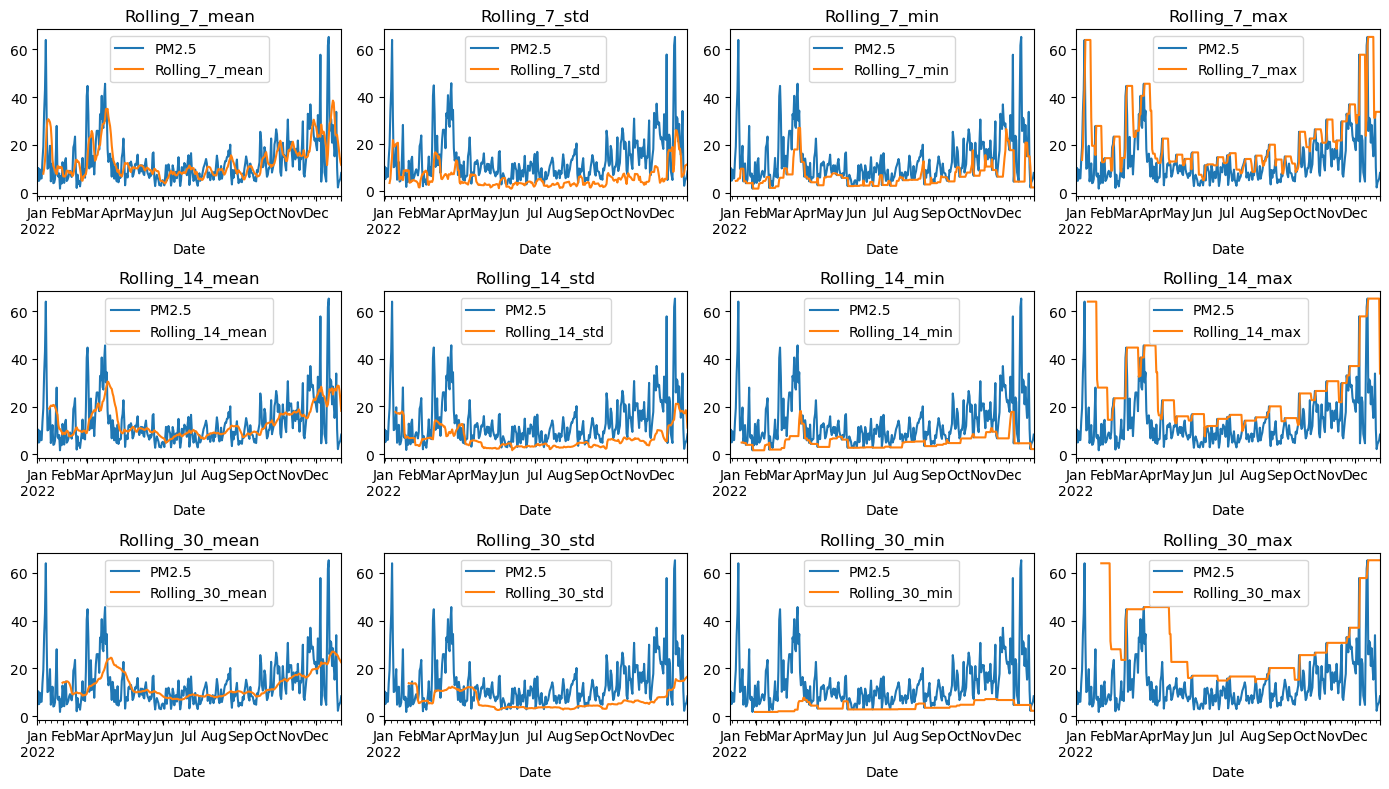

In [90]:
fig, ax = plt.subplots(3,4,figsize=(14, 8))
axs = ax.flatten()
i = 0
for size in window_sizes:
    for stat in statistics:
        data['PM2.5'].plot(ax=axs[i])
        data[f'Rolling_{size}_{stat}'].plot(ax=axs[i])
        axs[i].set(title=f'Rolling_{size}_{stat}')
        axs[i].legend()
        i = i + 1
plt.tight_layout()
plt.show()

Wartości 2-tygodniowe raczej nie będą potrzebne, te z tygodnia i miesiąca raczej szczegółowo oddają obraz sytuacji. Średnia zdecydowanie przyda się jako ogólna metryka dająca obraz na dane, odchylenie standardowe pokaże zmienność, a wartości maksymalne pokażą jak bardzo zła jest sytuacja. Wartości minimalne można pominąć, ponieważ analizy zanieczyszczeń poweitrza skupiają się bardziej na maksymalnych.

#### Okna typu expanding

In [91]:
data['Expanding_mean'] = data['PM2.5'].shift(1).expanding().mean()
data['Expanding_std'] = data['PM2.5'].shift(1).expanding().std()

In [92]:
data.head()

,PM2.5,Rolling_7_mean,Rolling_7_std,Rolling_7_min,Rolling_7_max,Rolling_14_mean,Rolling_14_std,Rolling_14_min,Rolling_14_max,Rolling_30_mean,Rolling_30_std,Rolling_30_min,Rolling_30_max,Expanding_mean,Expanding_std
Date,,,,,,,,,,,,,,,
2022-01-01,4.934921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,10.341562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.934921,NaN
2022-01-03,5.007348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.638241,3.823073
2022-01-04,9.688094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.761277,3.100829
2022-01-05,5.914476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.492981,2.924322


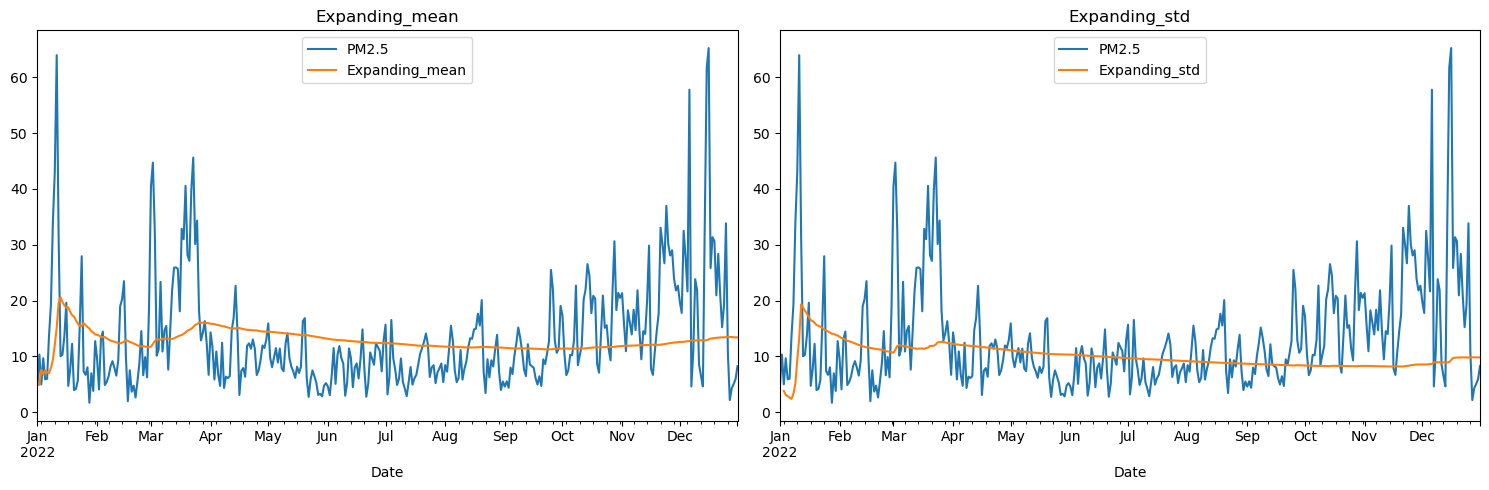

In [93]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
axs = ax.flatten()
for i, col in enumerate(['Expanding_mean', 'Expanding_std']):
    data['PM2.5'].plot(ax=axs[i])
    data[col].plot(ax=axs[i])
    axs[i].set(title=col)
    axs[i].legend()
plt.tight_layout()
plt.show()

Wykresy są bardzo podobne do siebie - średnia krocząca i odchylenie standardowe rosną lub maleją w podobny sposób wraz z przesuwającym się oknem czasowym. Oba wskaźniki mogą przydać się w dalszej analizie szeregu czasowego, okaże się to w przyszłości.

#### Okna typu nested

In [94]:
for size_outer in window_sizes:
    for size_inner in window_sizes:
        if size_outer > size_inner:
            data[f'Nested_{size_outer}_{size_inner}_mean'] = data['PM2.5'].rolling(window=size_outer, closed='left').agg('mean').rolling(window=size_inner, closed='left').agg('mean')


In [95]:
data.head(30)

,PM2.5,Rolling_7_mean,Rolling_7_std,Rolling_7_min,Rolling_7_max,Rolling_14_mean,Rolling_14_std,Rolling_14_min,Rolling_14_max,Rolling_30_mean,Rolling_30_std,Rolling_30_min,Rolling_30_max,Expanding_mean,Expanding_std,Nested_14_7_mean,Nested_30_7_mean,Nested_30_14_mean
Date,,,,,,,,,,,,,,,,,,
2022-01-01,4.934921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,10.341562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.934921,NaN,NaN,NaN,NaN
2022-01-03,5.007348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.638241,3.823073,NaN,NaN,NaN
2022-01-04,9.688094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.761277,3.100829,NaN,NaN,NaN
2022-01-05,5.914476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.492981,2.924322,NaN,NaN,NaN
2022-01-06,6.005189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.177280,2.629084,NaN,NaN,NaN
2022-01-07,13.716152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.981932,2.399715,NaN,NaN,NaN
2022-01-08,19.322357,7.943963,3.358183,4.934921,13.716152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.943963,3.358183,NaN,NaN,NaN
2022-01-09,33.909314,9.999311,5.139823,5.007348,19.322357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.366262,5.084271,NaN,NaN,NaN


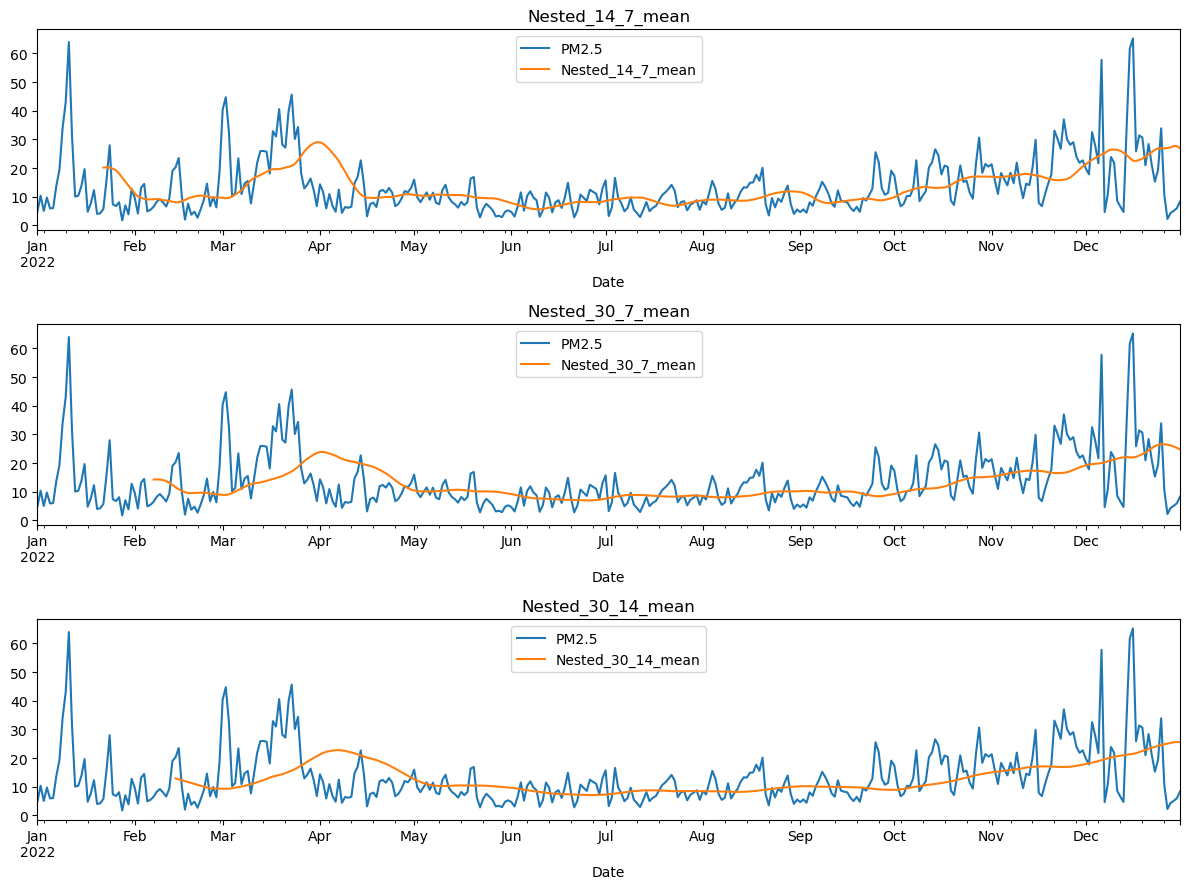

In [96]:
fig, ax = plt.subplots(3,1,figsize=(12, 9))
axs = ax.flatten()
i = 0
for size_outer in window_sizes:
    for size_inner in window_sizes:
        if size_outer > size_inner:
            data['PM2.5'].plot(ax=axs[i])
            data[f'Nested_{size_outer}_{size_inner}_mean'].plot(ax=axs[i])
            axs[i].set(title=f'Nested_{size_outer}_{size_inner}_mean')
            axs[i].legend()
            i = i + 1
plt.tight_layout()
plt.show()

Nie jestem przekonana jak okna zagnieżdżone przydadzą się w tej analize, dlatego postawiłam na średnią, gdyż jest ona najbardziej ogólną i przystępną metryką. Analogicznie jak dla okna typu rolling zostawię jedynie wartości odpowiadające tygodniowi i miesiącowi (Nested_30_7).

#### Lagi w oparciu o ACF

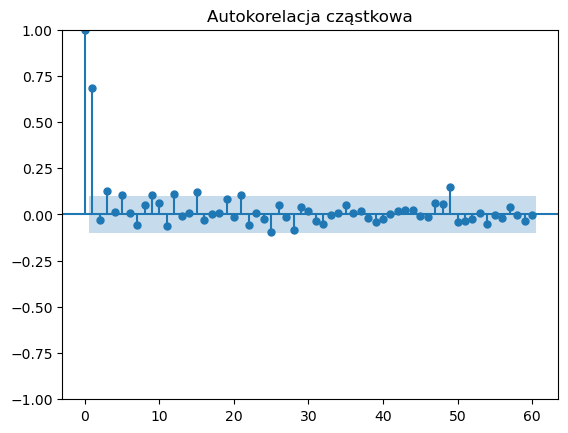

In [97]:
plot_pacf(data['PM2.5'], title='Autokorelacja cząstkowa', lags=60)

plt.show()

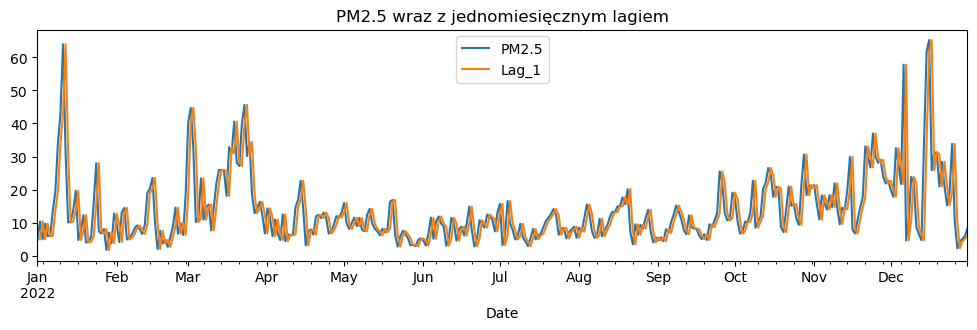

In [98]:
data['Lag_1'] = data['PM2.5'].shift(1)
data[['PM2.5', 'Lag_1']].plot(title='PM2.5 wraz z jednomiesięcznym lagiem', figsize=(12,3))
plt.show()

Tylko lag 1-dniowy ma dużą wartość autokorelacji, dlatego też tylko on został dodany do zbioru danych. Może się przydać w dalszych analizach.

#### Cechy oparte o samą datę

In [99]:
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['month'] = data.index.month

data['season'] = 0
for date in data.index:
    month = date.month
    if 2 < month < 6:
        data.loc[date,'season'] = 1 # wiosna
    elif 5 < month < 9: 
        data.loc[date,'season'] = 2 # lato
    elif 8 < month < 12: 
        data.loc[date,'season'] = 3 # jesień
    else:
        data.loc[date,'season'] = 4 # zima

Z uwagi na to, że przy zanieczyszczeniach okres czasu wnosi bardzo dużo informacji wyciągnęłam 4 cechy:
- dzień tygodnia (w ciągu całego tygodnia na pewno tendencje będą inne przykładowo w weekendy i dni robocze)
- dzień miesiąca (być może kiedy ludzie na koniec miesiąca mają najmniej pieniędzy przed wypłatą to oszczędzają na wszystkim, więc mniej palą?)
- miesiąc (przydatny, aby wiedzieć w którym miejscu roku jesteśmy, być może dla konkretnego miesiąca wypłyną ciekawe wnioski, których nie udałoby się wyciągnąć bez tej cechy)
- pora roku (będzie widać chociażby to, że zimą ludzie palą w piecach, a latem nie)

#### Trend, sezonowości i rezydua

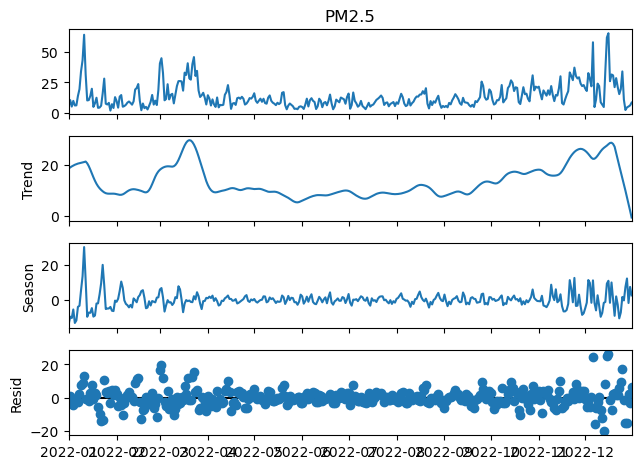

In [100]:
res = STL(data['PM2.5'].dropna(), period=12).fit()

data['trend'] = res.trend
data['seasonal'] = res.seasonal
data['resid'] = res.resid

res.plot()
plt.show()

Przydatność wyciągniętych cech:
- trend - może się przydać, żeby zbadać długoterminowe tendencje poziomu zanieczyszczenia
- sezonowość - może się przydać do identyfikacji cyklicznych wzorców
- rezydua - mogą się przydać do identyfikacji nieregularnych zmian w danych, ale raczej są mniej ważne np. od trendu

## Wnioski

Wszystkie wnioski i wizualizacje były przedstawiane na bieżąco w poszczególnych sekcjach dotyczących cech. Podsumowując, lista zapisywanych cech:
- Rolling_7_mean
- Rolling_7_std
- Rolling_7_max
- Rolling_30_mean
- Rolling_30_std
- Rolling_30_max
- Expanding_mean
- Expanding_std
- Nested_30_7_mean
- Lag_1
- day_of_week
- day_of_month
- month
- season
- trend
- seasonal
- resid

## Zapisanie

In [101]:
data[['Rolling_7_mean','Rolling_7_std','Rolling_7_max','Rolling_30_mean','Rolling_30_std','Rolling_30_max','Expanding_mean','Expanding_std','Nested_30_7_mean','Lag_1','day_of_week',
      'day_of_month','month','season','trend','seasonal','resid']].to_csv('data/pm25_features.csv')